# Physics 240 
## Intermediate Physics Laboratory
## FINAL EXAM

### Instructions: 
Answer the following questions and typeset your answers within this notebook, 
using a mix of markdown and LaTeX code. Some of your work will likely be done
by hand; for this work, make sure to turn in these calculations, but still put the 
answers in this Jupyter Notebook. 

Follow the steps below and answer the questions as indicated.

In [1]:
## This cell installs custom CSS Cell Styles obtained from 
## Prof. Lorena Barba at https://github.com/barbagroup/AeroPython 
from IPython.core.display import HTML
def css_styling():
    styles = open('styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()

## Step 1: Create a GitHub Repository and make an initial commit.
    a. Create a folder in your Documents folder called LastnameFirstname240FinalExam.
    b. Create a new repository within this folder called 240FinalExam
    c. Save this file into the above folder as LastnameFirstnameAnswers.ipynb 
    d. You should then see an uncommitted change to the 240FinalExam repository; name this "initial commit"
    and publish the changes.
    
For example, if your name was Albert Einstein, you'd create a folder called   
    *EinsteinAlbert240FinalExam*,   
then you would create a new GitHub repository (within this folder) called   
    *240FinalExam*   
and would save this file into the folder 240FinalExam as    
    *EinsteinAlbertFinalAnswers.ipynb*   
and upload the file to your github account. 

Hint: Once you complete steps (a) and (b), you can simply close and halt this notebook (from the Jupyter Notebook file menu, and use your file system browser to drag this file into the folder 240FinalExam. Then this file's existence should show up as as an uncommitted change which you can publish (after first labelling it as the initial commit, of course). 

All of the above may be easily done by using a GitHub Gui Client available for OSX, Linux, and Windoze at:
https://github.com/gitterHQ/desktop

For the following questions, I encourage you to make and publish a new commit after you finish each question.


# Question 1
## Statistical Uncertainty with dropped velociraptors

<img src="Velociraptor.jpg" width=150 height=150>

A velociraptor is dropped from a height of 10.0 $\pm$ 0.1 meters and the fall time   
is measured to the nearest 0.01 seconds. This *experiment* is performed a dozen times with the following drop times in seconds obtained:   
1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35   
Calculate the mean value of the drop time and the root mean square uncertainty, $\Delta t_{rms}$. You may use python or---if you like suffering---your calculator. 

### Solution method :

The root mean squared deviation is calculated as follows:

$$\sqrt{ \frac{ \Sigma (t_n - \bar{t} \ )^2}{N}}$$

I will define a function and feed it the appropriate data to obtain this value and then I will check it against the value obtained by numpy's built in standard deviation command.

In [2]:
import numpy as np
import matplotlib as plt
from scipy.optimize import curve_fit
% matplotlib inline

raptorData = [1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35]
mean1 = np.mean(raptorData)
n = len(raptorData)

def rootmeansquare(x, m, n):
    return np.sqrt(np.sum((x-m)**2/n))

deviation = rootmeansquare(raptorData, mean1, n)

print(r'Mean:', mean1, r', Number of Values:', n)
print(r'Calculated RMS deviation:', deviation)
print(r'Python interpretted standard deviation:', np.std(raptorData))

Mean: 1.41416666667 , Number of Values: 12
Calculated RMS deviation: 0.141330483462
Python interpretted standard deviation: 0.141330483462


### Question 1 Answer

Mean time = $1.41 \ s$

$\Delta t_{rms} = 0.14 \ s $

# Question 2
## Error Propagation; measuring g via dropped velociraptors

Suppose you assume that the velociraptor drop experiment was used to determine the acceleration due to gravity. Using your knowledge of basic kinematics (and assuming
no air resistance), calculate the experimental value of $g$ that you should report for this data.

### Solution Method:

In order to obtain a value for g, we can use Newton's Laws to write:

$$ x(t) = v_0t + \frac{1}{2}a t^2 $$

We know that at $x(0) = 0, v_0 = 0$ and also that $a = g$ and hence is the variable we hope to identify. Rearranging yeilds:

$$ g = \frac{ 2 \Delta x }{ t^2 } $$

Now we can use this equation to obtain an array of values for g given that $ \Delta x $ is known to be $10 \pm 0.1  m$. Then we just need to take the standard deviation of the values and that will be the uncertainty in $g$.


In [3]:
def expResult(x,t):
    return 2*x*t**(-2)

gExperimental = [0,0,0,0,0,0,0,0,0,0,0,0]
gExperimental[0] = expResult(10, raptorData[0])
gExperimental[1] = expResult(10, raptorData[1])
gExperimental[2] = expResult(10, raptorData[2])
gExperimental[3] = expResult(10, raptorData[3])
gExperimental[4] = expResult(10, raptorData[4])
gExperimental[5] = expResult(10, raptorData[5])
gExperimental[6] = expResult(10, raptorData[6])
gExperimental[7] = expResult(10, raptorData[7])
gExperimental[8] = expResult(10, raptorData[8])
gExperimental[9] = expResult(10, raptorData[9])
gExperimental[10] = expResult(10, raptorData[10])
gExperimental[11] = expResult(10, raptorData[11])

gdev = np.std(gExperimental)
gmean = np.mean(gExperimental)
print(r'g =', gmean, r'+/-', gdev)
print(gExperimental)

g = 10.3396997569 +/- 2.34433855551
[13.437248051599033, 10.351431085347551, 8.324661810613943, 9.780429360848942, 16.232448664881094, 7.436049970255802, 9.645061728395062, 11.306461642828875, 8.324661810613943, 9.008603216071348, 9.255402841408673, 10.973936899862824]


### Question 2 Answer

g = $ (10.34 \pm 2.34) \ \frac{m}{s^2} $ 

# Question 3
## Determining g with a point mass pendulum via plotting

Suppose that you measure the period of a simple pendulum as a function of length   
and obtain the following data:   

Period Values ($\pm 0.1$ s) =  0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50.   
Length $(\pm 0.03)$ m =  0.010,  0.025, 0.070,  0.10,  0.140, 0.230, 0.310, 0.350, 0.500   

Knowing that the period of a simple pendulum is   
$\displaystyle T = 2π\sqrt{\frac{L}{g}}$   
and use an appropriate graph, such that the plot:   

    a. gives a straight line whose slope   
       directly gives the value of g   
    b. shows data points with error bars   
    c. includes axes labels and units   
    d. includes a best fit line to the data.   

Note that you might not be on the earth when conducting this experiment.


### Solution method:
Rearranging the given equation $\displaystyle T = 2π\sqrt{\frac{L}{g}}$ we find:

$$ g = \frac{4 \pi^2 L}{T^2} $$

This equation shows that if we graph $T^2 \ vs. \ 4 \pi^2 L$ the slope should be a simple linear relationship reflecting the value for $g$.

/Users/admin/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


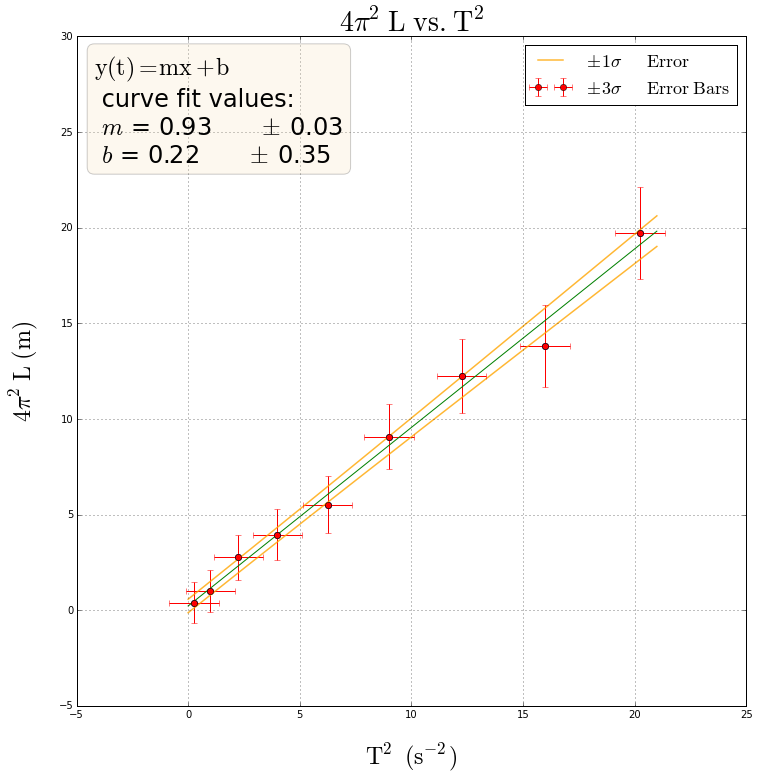

In [9]:
import matplotlib.pyplot as plt

period = [0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50]
length = [0.010,  0.025, 0.070,  0.10,  0.140, 0.230, 0.310, 0.350, 0.500]

i = 0

xdata = [0,0,0,0,0,0,0,0,0]
ydata = [0,0,0,0,0,0,0,0,0]
xsteps = np.linspace(0,21,9)

for i in range(0,9):
    ydata[i] = 4*length[i]*np.pi**2
    xdata[i] = period[i]**2
    
def linearfit(t,m,b):
    return m*t + b

fitParams, fitCovariance = curve_fit(linearfit, xdata, ydata)

sigma = np.sqrt([fitCovariance[0,0], fitCovariance[1,1]])

values2 = np.array([
    linearfit(xsteps, fitParams[0]+sigma[0], fitParams[1]+sigma[1]),
    linearfit(xsteps, fitParams[0]-sigma[0], fitParams[1]-sigma[1]),
    linearfit(xsteps, fitParams[0]+sigma[0], fitParams[1]-sigma[1]),
    linearfit(xsteps, fitParams[0]-sigma[0], fitParams[1]+sigma[1])          
    ])

fitError = np.std(values2, axis=0)
curveFit = linearfit(xsteps, fitParams[0], fitParams[1])
dataFit = linearfit(xdata, fitParams[0], fitParams[1])
nSigma = 3
N = len(xdata)
dx = (max(xdata) - min(xdata))/N

fig = plt.figure(figsize=(12,12), dpi=100, facecolor='w')
ax = fig.add_subplot(111)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

plt.plot(xdata,ydata,'o')
plt.plot(xsteps, curveFit)
"""
plt.bar(left=xdata, 
    height = 2*nSigma*fitError,  
    width=dx, 
    bottom = curveFit - abs(nSigma*fitError), 
    orientation = 'vertical', 
    alpha=0.40, 
    color = 'purple',
    edgecolor = 'blue',
    label = r"$ \pm 3\sigma\;\;\mathrm{Error \ Bars}$")
"""
plt.plot(xsteps, curveFit+fitError, 
    linewidth = 1.5, 
    alpha = 0.8, 
    color = 'orange',
    label = r"$ \pm 1\sigma\;\;\mathrm{Error}$")

plt.plot(xsteps, curveFit-fitError, 
    linewidth = 1.5, 
    alpha = 0.8, 
    color = 'orange')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(-4.2, 23.6, 
    ("$\mathrm{y(t)=mx + b \\;}$\n curve fit values: \n $m$ = %.2f\t $\pm$ %.2f\n $b$ = %.2f\t $\pm$ %.2f" 
    % (fitParams[0], sigma[0], fitParams[1], sigma[1])), fontsize=24,bbox=props )


plt.grid(True)
plt.ylim(-5,30)
plt.xlim(-5,25)
plt.title(r'$\mathrm{4 \pi^2 L \ vs. \ T^2}$',fontsize=28)
plt.xlabel(r'$\mathrm{T^2 \ (s^{-2})}$',fontsize=24)
plt.ylabel(r'$\mathrm{4 \pi^2 L \ (m)}$',fontsize=24)

plt.errorbar(xdata, ydata, fmt = 'ro', yerr = fitError*nSigma, xerr = dx/2, label = r"$ \pm 3\sigma\;\;\mathrm{Error \ Bars}$")
ax.legend(fontsize=18)

plt.show()


### Question 3 Answer

$g \pm\;\Delta g = (0.93 \pm 0.03 ) \ \frac{m}{s^2}$

# Final Step for online portion
## Final steps, then move on to written portion

Now make sure to commit your changes to your master copy, but before doing so, place a link to your repository in the next cell.   

Repository Link = https://github.com/mjones98806/240FinalExam